# Portafolios de Inversión
## Tarea 4
José Armando Melchor Soto

---
### Librerías 



In [2]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

---

### Activos

- **LLY (Eli Lilly)**
- **NVDA (NVIDIA)**
- **MSFT (Microsoft)** 
- **KXI (iShares Global Consumer Staples ETF)**


---

### Investigación de las Emisoras

Realiza un breve resumen de los activos, describiendo su giro de negocio, sector y productos o servicios.


- **LLY (Eli Lilly)**:
    - Esta es una empresa con sede en Indianapolis, la cual fabrica, desarrolla y comercializa medicamentos para tratar enfermedades como lo pudieran ser la diabetes o el cancer. Esta ofrece productos como lo son Mounjaro, Trulicity y Zyprexa. El sector económico a la cual se decia esta empresa es a la salud y su giro es la farmaceútica.
- **NVDA (NVIDIA)**:
    - Esta es una empresa  con sede en Santa Clara (California),la cual fabrica unidades de procesamiento gráfico (GPU) , principalmente para videojuesgos , AI , automatización , etc. Esta es la que ofrece productos como lo son las tarjetas gráficas de GeForce, RTX y NVIDIA. El sector económico a la cual se dedica esta empresa es a la de la tecnología de la información y su giro es la tecnología y semiconductores.
- **MSFT (Microsoft)**: 
    - Esta es una empresa con sede en Redmond (Washington), la cual desarrolla sistemas operativos como Windows , las aplicaciones como Word de Microsoft 365 , etc. Una de sus innovaciones más recientes , es la de la AI con Copilot y su inversión en OpenAI . El sector económico a la cual se dedica esta empresa es a la de la tecnología de la información y su giro es el software y servicios tecnologícos. 
- **KXI (iShares Global Consumer Staples ETF)**:
    - Esta es una empresa  la cual invierte en otras compañías que producen productos escenciales como alimento s, bebidas , productos de limpieza y aseo personal. Esta incluye empresas como Nestlé , Coca-Cola y PepsiCo. El sector económico a la cual se dedica esta empresa es a la de bienes de consumo básico y su giro es un ETF , que lo que hace es agrupar a la empresas del sector de bienes de consumo básico.


#### Bibliografía

- **LLY (Eli Lilly)**:
    - Eli Lilly and Company (LLY) Company Profile & Facts - Yahoo Finance. (n.d.). Yahoo Finance. https://finance.yahoo.com/quote/LLY/profile/
- **NVDA (NVIDIA)**:
    - NVIDIA Corporation (NVDA) company Profile & Facts - Yahoo Finance. (n.d.). Yahoo Finance. https://finance.yahoo.com/quote/NVDA/profile/
- **MSFT (Microsoft)**: 
    - Microsoft Corporation (MSFT) Company Profile & Facts - Yahoo Finance. (n.d.). Yahoo Finance. https://finance.yahoo.com/quote/MSFT/profile/
- **KXI (iShares Global Consumer Staples ETF)**:
    - KXI | iShares Global Consumer Staples ETF | ETF Channel. (n.d.). https://www.etfchannel.com/symbol/kxi/
    - IShares Global Consumer Staples ETF (KXI) Company Profile & Facts - Yahoo Finance. (n.d.). Yahoo Finance. https://finance.yahoo.com/quote/KXI/profile/

---

### Importación de Datos

In [3]:
prices = yf.download(['LLY','NVDA','MSFT','KXI'],start= '2018-01-01' , end = '2024-09-25')['Close']
prices.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-02,43.904778,75.427605,79.328522,4.929085
2018-01-03,43.908943,75.837349,79.697701,5.253486
2018-01-04,44.004658,76.175835,80.399155,5.281181
2018-01-05,44.287651,77.111092,81.395950,5.325934
2018-01-08,44.270996,76.719170,81.479027,5.489124


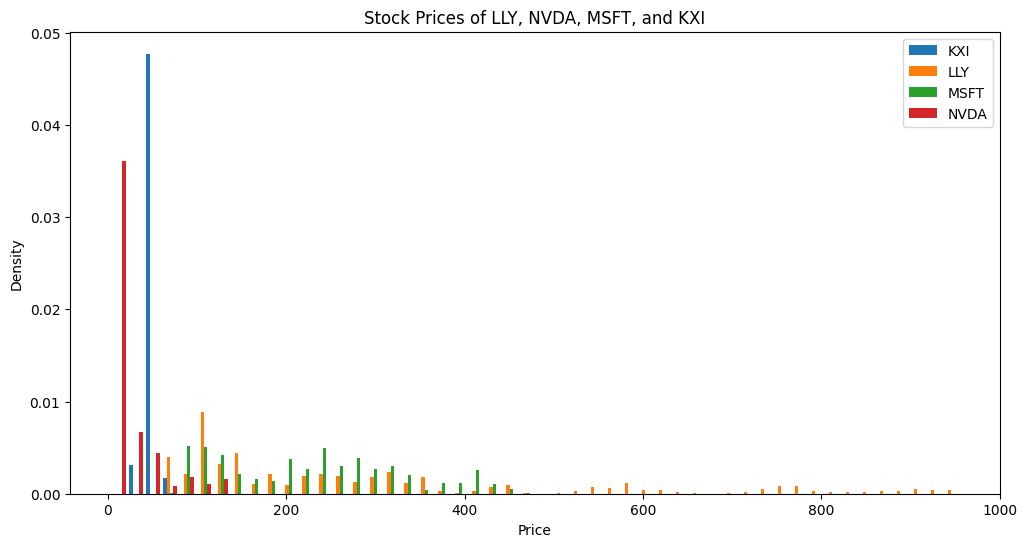

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(prices, label=prices.keys(),density=True, bins=50)
plt.title('Stock Prices of LLY, NVDA, MSFT, and KXI')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

---

### Rendimientos Diarios

In [5]:
ret = prices.pct_change().dropna()
ret.head()

Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-03,0.000095,0.005432,0.004654,0.065814
2018-01-04,0.002180,0.004463,0.008801,0.005272
2018-01-05,0.006431,0.012278,0.012398,0.008474
2018-01-08,-0.000376,-0.005083,0.001021,0.030641
2018-01-09,-0.002068,-0.000813,-0.000680,-0.000270


### Rendimiento Promedio 

In [6]:
ret_mean = ret.mean()
ret_mean*100

Ticker
KXI     0.026537
LLY     0.165253
MSFT    0.116359
NVDA    0.242879
dtype: float64

### Volatilidad 

In [7]:
vol = ret.std()
vol*100

Ticker
KXI     0.936493
LLY     1.877982
MSFT    1.837325
NVDA    3.279349
dtype: float64

### Matriz de Covarianza 

In [8]:
cov = ret.cov()
cov

Ticker,KXI,LLY,MSFT,NVDA
Ticker,,,,
KXI,0.000088,0.000074,0.000104,0.000123
LLY,0.000074,0.000353,0.000130,0.000158
MSFT,0.000104,0.000130,0.000338,0.000403
NVDA,0.000123,0.000158,0.000403,0.001075


---

### Portafolio de Mínima Varianza 

In [9]:
def opt_min_var(ret: pd.DataFrame) -> np.ndarray:
    # Obtener matriz de covariânza varianza
    cov = ret.cov()
    # Definir funcion objetivo
    varianza = lambda w: w.T @ cov @ w
    # Definir valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n) / n
    # Definir las cotas
    bounds = [(0, 1)] * n
    # Definir las restricciones
    restr = lambda w: sum(w)-1
    # Definir tolerancia
    tol = 1e-100
    # Aplicar función de scipy.optimize
    min_var = minimize(
        fun=varianza,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': restr, 'type': 'eq'},
        tol=tol
    )
    # Encontrar pesos eficientes 
    w_minvar = min_var.x
    
    return w_minvar

In [10]:
w_minvar_func = opt_min_var(ret)

w_minvar_func.round(4)

array([0.9536, 0.0464, 0.    , 0.    ])

#### Rendimiento Portafolio de Mínima Varianza 

In [11]:
red_minvar = sum(w_minvar_func * ret_mean)
red_minvar*100

0.03297831965548537

#### Volatilidad Portafolio de Mínima Varianza

In [12]:
vol_minvar = np.sqrt(w_minvar_func.T @ cov @ w_minvar_func)
vol_minvar*100

0.9331240585685827

---

### Portafolio de Máximo Sharpe

#### tasa libre de riesgo

In [13]:
rf = 0.03

#### Optimización Máximo Sharpe

In [14]:
def max__sharpe(ret:pd.DataFrame,rf:float)-> np.array:

    # Input 
    E= ret.mean()
    cov = ret.cov()
    rf = rf/252

    # Función objetivo para maximizar la ratio de Sharpe
    sharpe = lambda w: -((w.T @ (E - rf)) / np.sqrt(w.T @ cov @ w))
    
    # Valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n)/n
    # Cotas
    bounds = [(0,1)]*n
    # Restricciones
    rest = lambda w: sum(w)-1
    # Tolerancia
    tol = 1e-100

    # Optimización
    max_sharpe = minimize(
        fun=sharpe,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': rest, 'type': 'eq'},
        tol=tol)
    
    w_max = max_sharpe.x

    return w_max

In [15]:
# Obtener los pesos
w_max_= max__sharpe(ret,rf).round(4)
w_max_

array([0.    , 0.6917, 0.    , 0.3083])

#### Rendimiento Portafolio de Máximo Sharpe 

In [16]:
rend_max_sharpe = w_max_.T @ (ret.mean())
rend_max_sharpe*100

0.18918546135749184

#### Volatilidad Portafolio de Máximo Sharpe

In [17]:
vol = np.sqrt (w_max_.T @ ret.cov() @ w_max_)
vol*100

1.8392615103165724

---

### Portafolio equitativamente ponderado

#### Ponderación

In [18]:
w= np.array([0.25, 0.25, 0.25, 0.25])

#### Rendimiento Promedio Portafolio equitativamente ponderado

In [19]:
rend_port = w.T @ ret.mean()
rend_port*100

0.13775729059756536

#### Volatilidad Portafolio equitativamente ponderado

In [20]:
vol_port = np.sqrt(w.T @ cov @ w)
vol_port*100

1.5485191709471615

---

### Gráfica Frontera Eficiente 

In [21]:
# Generacion de portafolios aleatorios
n = len(ret.keys())
np_port = 100000
random_w = np.random.dirichlet(np.ones(n), np_port)
# Calcular rendimientos y volatilidades
rend_aleatorios = [ret_mean.T @ random_w[w] for w in range(np_port)]
vol_aleatorios = [np.sqrt(random_w[w].T @ cov @ random_w[w]) for w in range(np_port)]

Rendimientos: Ticker
KXI     0.026537
LLY     0.165253
MSFT    0.116359
NVDA    0.242879
dtype: float64
Volatilidad: Ticker
KXI     14.866360
LLY     29.812033
MSFT    29.166630
NVDA    52.058044
dtype: float64


C:\Users\ppmel\AppData\Local\Temp\ipykernel_4828\4219539989.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
C:\Users\ppmel\AppData\Local\Temp\ipykernel_4828\4219539989.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')


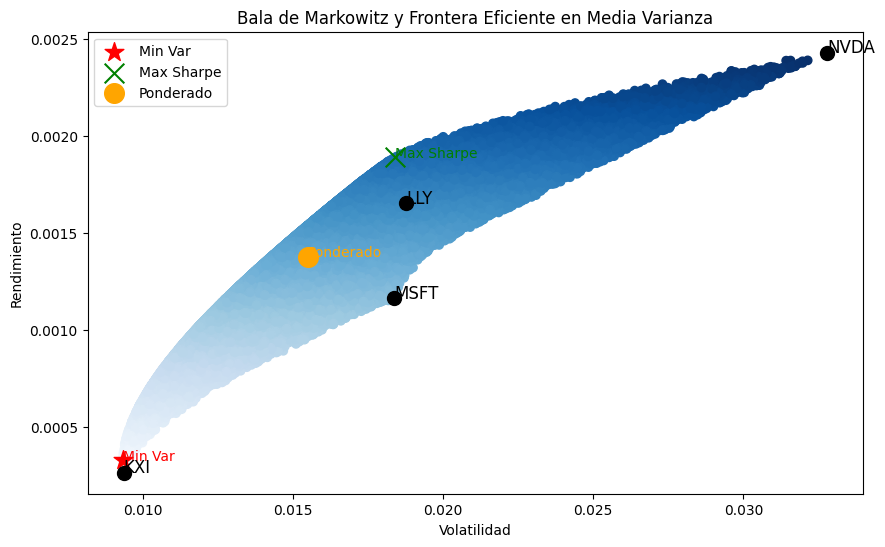

In [22]:
# Realizar grafica
plt.figure(figsize=(10,6))
# Scatter plot de portafolios aleatorios
plt.scatter(vol_aleatorios, rend_aleatorios,c= rend_aleatorios,cmap= 'Blues')

# Scatter plot de Minima Varianza
plt.scatter(vol_minvar, red_minvar, marker='*', color='red', s=200, label='Min Var')

plt.text(vol_minvar, red_minvar, 'Min Var', fontsize=10, color = 'red')

# Scatter plot de Maximo de Sharpe
plt.scatter(vol, rend_max_sharpe, marker='x', color='green', s=200, label='Max Sharpe')
plt.text(vol, rend_max_sharpe, 'Max Sharpe', fontsize=10, color = 'green')

# Scatter plot de portafolio igual ponderado
plt.scatter(vol_port, rend_port, marker='o', color='orange', s=200, label='Ponderado')
plt.text(vol_port, rend_port, 'Ponderado', fontsize=10, color='orange')

# Nombrar eje x, y, titulo
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Bala de Markowitz y Frontera Eficiente en Media Varianza') 

# Graficar coordenadas de activos individuales
ind_rend = ret.mean()
ind_vol = ret.std()
print('Rendimientos:', ind_rend*100)
print('Volatilidad:', ind_vol*np.sqrt(252)*100)

for i in range(n):
    plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
    plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')
    plt.legend()
    plt.grid()

plt.show()

---

### Conclusiones 

En cuanto al riesgo por activo, el que tuvo menos volatilidad fue `KXI`, pero también hay que decir que es el que menos rendimiento ofrece comparado con los demás, así que aunque tiene bajo riesgo, no necesariamente es el mejor. Si comparamos los tres portafolios, el que menos riesgo tiene es el de mínima varianza, ya que justo ese método busca minimizar la volatilidad, y lo logró bastante bien, teniendo una volatilidad parecida a la de `KXI`.

Si hablamos del rendimiento, el activo que más sobresale es `NVDA`, ya que tiene un rendimiento bastante bueno, aunque también viene con mucha volatilidad, o sea, mucho riesgo. En cambio, si vemos los portafolios, el que tuvo un mejor equilibrio entre riesgo y rendimiento fue el de máximo Sharpe, porque consigue que haya una buena relación entre el retorno y el riesgo, lo cual hace que este portafolio se considere como óptimo. El que peor salió fue el portafolio ponderado, ya que tiene mucha volatilidad pero no compensa con buen rendimiento, por lo que no es eficiente.

Esto se puede ver claramente en la frontera eficiente, ya que este portafolio ponderado no está en una zona buena, y por eso no tiene una buena relación rendimiento/riesgo. Entonces, no vale la pena invertir en un portafolio así, porque no te está dando un buen retorno por el riesgo que estás asumiendo.

Un portafolio puede ser mejor que otro si cumple con el objetivo de tener una buena relación rendimiento/riesgo. No se trata nada más de que tenga buen rendimiento o que tenga poco riesgo, sino que el equilibrio entre ambos sea el mejor posible, además de que cumpla con las restricciones que se dieron en el problema.

Algo interesante es que cuando vemos las ponderaciones que se obtienen con cada método, notamos que en mínima varianza hay dos activos que no reciben nada de peso, que son `MSFT` y `NVDA`, lo que nos dice que no ayudan a reducir la volatilidad, entonces es mejor no incluirlos, además que son dos activos que tienen el mismo sector economico , por lo que podría influir en los resultados dados. Y en el caso del portafolio de máximo Sharpe, los activos que se quedan con 0% de peso son `KXI` y también `MSFT`. Aquí lo que llama la atención es que `MSFT` aparece en los dos como un activo que no sirve o es un activo 'basura' para el objetivo, por lo que no tiene sentido mantenerlo en el portafolio solo por “feeling”. 

Esto nos lleva a ver las ventajas y desventajas ya que no se debe elegir activos por intuición, ya que eso puede hacer que metas cosas que no aportan nada al portafolio, y terminas aumentando el riesgo de forma innecesaria. En cambio, cuando usas una estrategia cuantitativa, estás eligiendo con base en datos, fórmulas, resultados, y no por emoción o favoritismo. Puede haber una ventaja si a veces el feeling puede ayudarte si estás apostando a una empresa que es muy estable o sólida, pero eso no garantiza que el portafolio sea eficiente. Lo mejor es hacer el analisis correspondiente para la elección de etsos activos.


---